In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller



In [2]:
NFLX = pd.read_csv('C:\\Users\\saawa\\Downloads\\STA6857\\NFLX.csv')
NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX = NFLX.set_index('Date')
NFLX.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


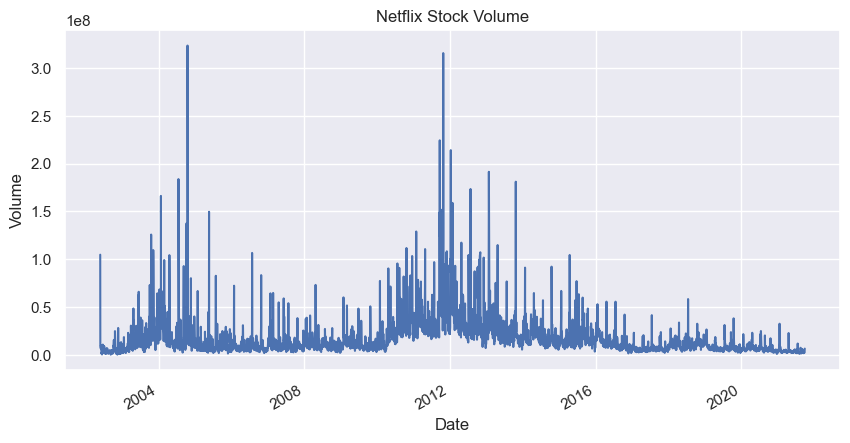

In [9]:
sns.set(rc={'figure.figsize':(10,5)})
NFLX['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Netflix Stock Volume')
plt.show()


C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


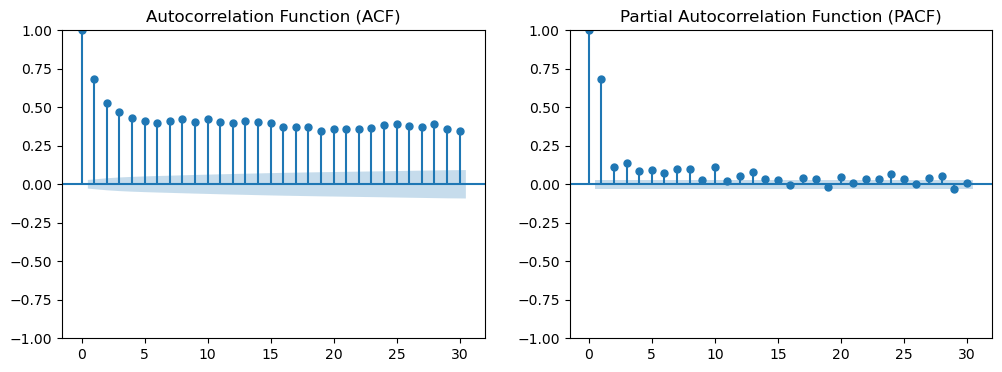

In [8]:
# Create subplots for ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ACF
plot_acf(NFLX['Volume'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(NFLX['Volume'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


#Plot a time series plot of your data.
#Include a horizontal line for the sample mean of your data.
#Include a trend line from regressing your observed values on time.
#Plot the ACF of your data.
#Plot the PACF of your data.




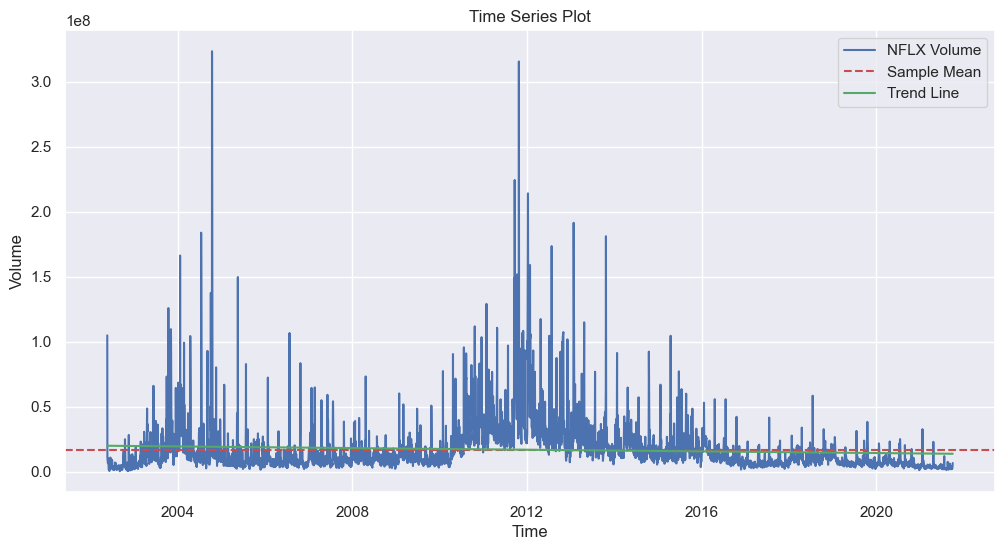

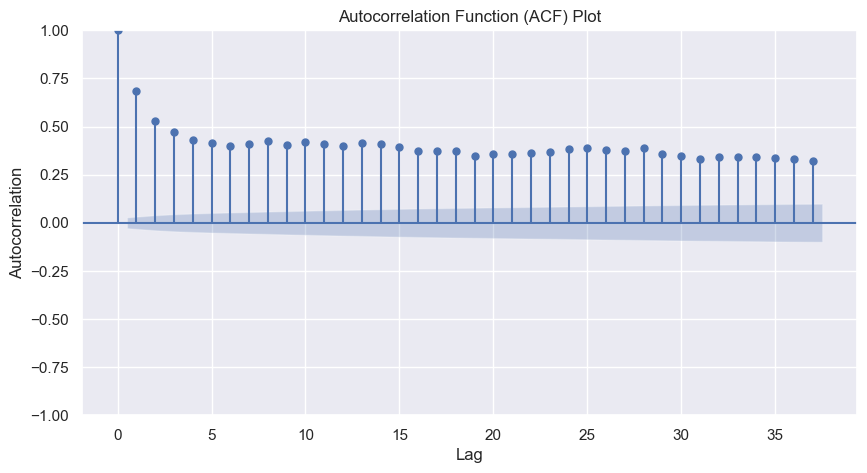

C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


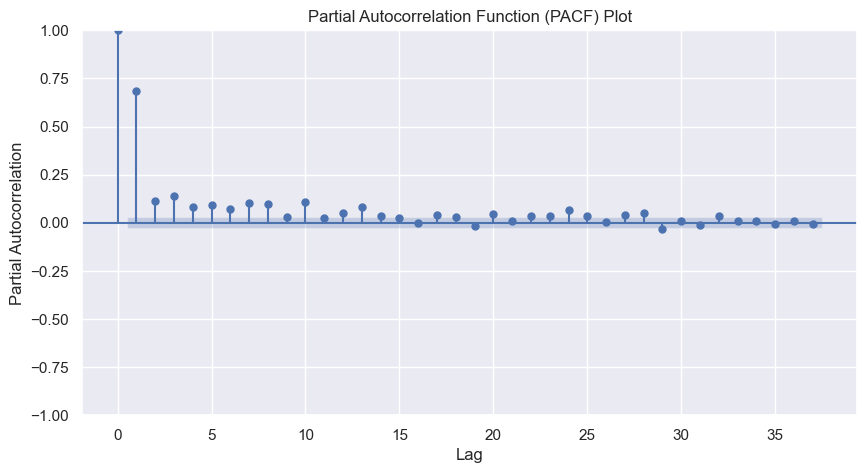

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression

# Load the data
NFLX = pd.read_csv('C:\\Users\\saawa\\Downloads\\STA6857\\NFLX.csv')
NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX = NFLX.set_index('Date')

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(NFLX['Volume'], label='NFLX Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Time Series Plot')

# Sample mean
sample_mean = NFLX['Volume'].mean()
plt.axhline(y=sample_mean, color='r', linestyle='--', label='Sample Mean')

# Trend line
X = np.arange(len(NFLX)).reshape(-1, 1)
Y = NFLX['Volume'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
trend = reg.predict(X)
plt.plot(NFLX.index, trend, label='Trend Line', color='g')

plt.legend()
plt.show()

# ACF plot
plot_acf(NFLX['Volume'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

# PACF plot
plot_pacf(NFLX['Volume'])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()


#Identify a reasonable seasonal trend for your data.
#Group your data by seasonal period and subinterval within a cycle (if annual, the seasonal period is the year, and the #subinterval is month or quarter).
#Visualize your data with the seasonal period as the horizontal axis, and observed value as the vertical axis, and create subplots by subinterval.
#Visualize your data with subinterval as the horizontal axis, and the observed value as the vertical axis, and create subplots by seasonal period.

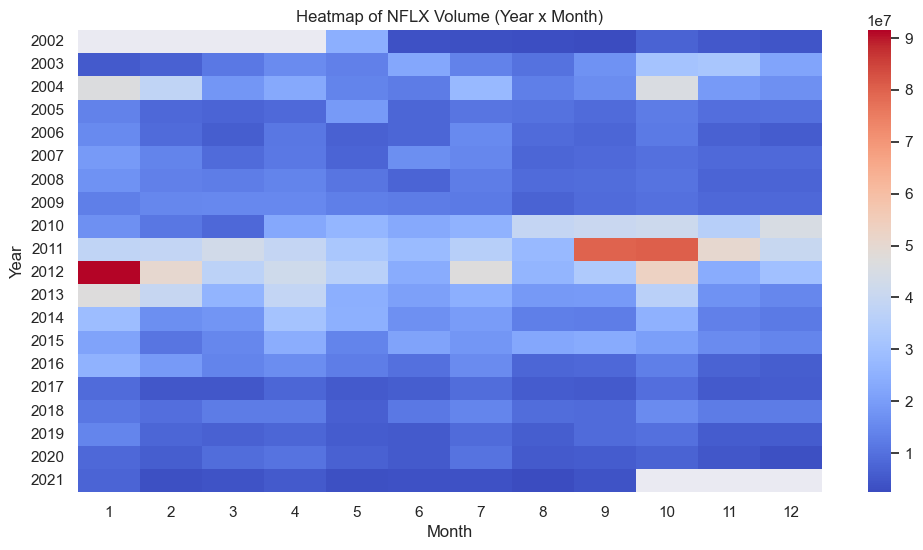

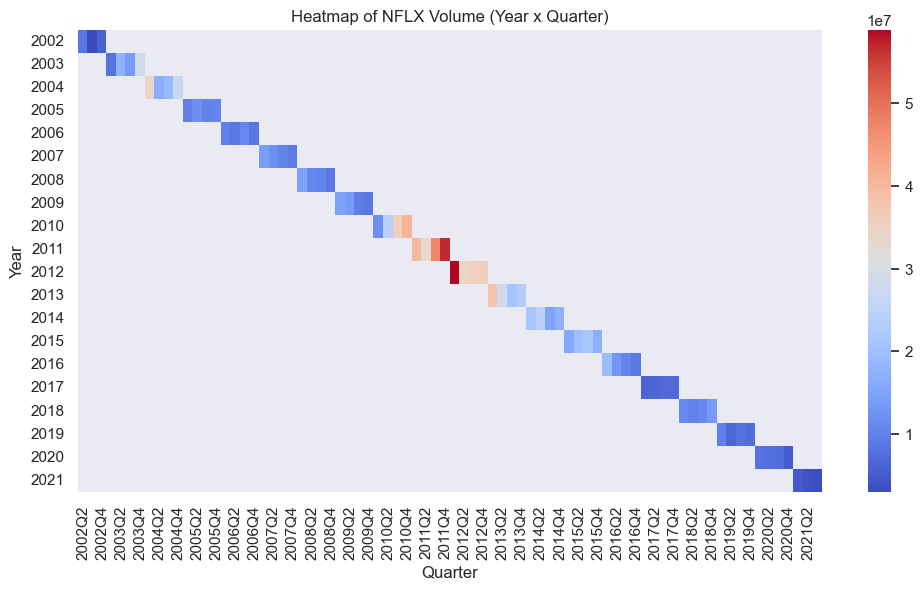

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year, month, and quarter from the index
NFLX['Year'] = NFLX.index.year
NFLX['Month'] = NFLX.index.month
NFLX['Quarter'] = NFLX.index.to_period('Q')

# Pivot the data to create a year x month heatmap
heatmap_data = NFLX.pivot_table(values='Volume', index='Year', columns='Month')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.0f', cbar=True)
plt.title('Heatmap of NFLX Volume (Year x Month)')
plt.show()

# Pivot the data to create a year x quarter heatmap
heatmap_data_quarter = NFLX.pivot_table(values='Volume', index='Year', columns='Quarter')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_quarter, cmap='coolwarm', annot=False, fmt='.0f', cbar=True)
plt.title('Heatmap of NFLX Volume (Year x Quarter)')
plt.show()


#Fit the best seasonal autoregressive integrated model that you can, it does not need to be seasonal.
#Fit five or more seasonal autoregressive integrated models - do not manually difference your data, let the function difference the data if needed.
#Plot each model.

In [14]:
import pandas as pd
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

Best model: {'trend': 0, 'exog': 0, 'ar': 2, 'ma': 2, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 2, 'reduced_ma': 2, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}, AIC: 173770.54175566306


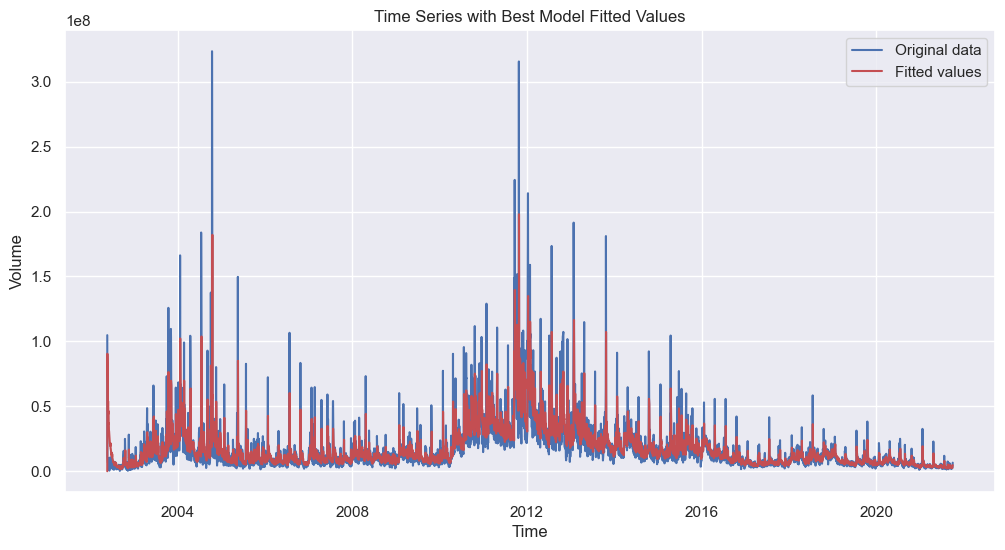

In [15]:

# Use the 'Volume' column as the time series
volume = NFLX['Volume']

# Define the parameter range for p, d, q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# Generate all combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))

# Fit multiple SARIMA models and find the best one based on AIC
best_aic = float('inf')
best_model = None
for order in pdq_combinations:
    try:
        model = SARIMAX(volume, order=order, seasonal_order=(0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_model = results
    except:
        continue

# Print the best model's order and AIC
print(f"Best model: {best_model.model_orders}, AIC: {best_model.aic}")

# Plot the original data and fitted values
plt.figure(figsize=(12, 6))
plt.plot(volume, label='Original data')
plt.plot(best_model.fittedvalues, label='Fitted values', color='r')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Time Series with Best Model Fitted Values')
plt.legend()
plt.show()


### Select a final model. Write a paragraph about why you selected your model.

The final model selected is a SARIMA(2, 0, 2) model, as indicated by the model orders {'ar': 2, 'ma': 2}.
This model has the lowest AIC value of 173770.54 among all the tested models.
The Akaike Information Criterion (AIC) is a metric that balances the goodness of fit of a model with its complexity, with lower AIC values indicating better models. 
By fitting multiple SARIMA models with different combinations of p, d, and q parameters and comparing their AIC values, we can identify the model with the lowest AIC as the best-fitting model for the given data.

The SARIMA(2, 0, 2) model effectively captures the underlying patterns in the time series data while maintaining a balance between complexity and overfitting. 
This suggests that the model is suitable for forecasting purposes. 
The selected model's performance is primarily based on the AIC; however, it's essential to evaluate the model's performance on out-of-sample data and consider other model selection criteria, such as BIC (Bayesian Information Criterion) or cross-validation, to ensure its generalizability and robustness.

In conclusion, the selected SARIMA(2, 0, 2) model is chosen based on its lowest AIC value, indicating that it provides the best fit to the data among the tested models while avoiding overfitting.






# Predict future values of your data using your final model.
Plot your original data with your predicted values.
Write a paragraph regarding your assessment of model quality.

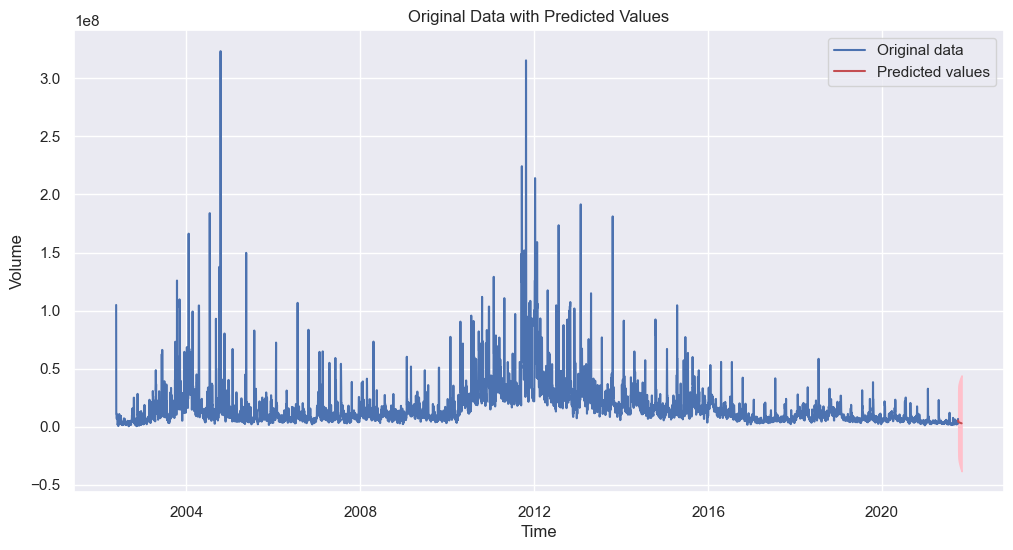

In [21]:

# Resample the data to a daily frequency
NFLX_daily = NFLX.resample('D').mean()

# Use the 'Volume' column as the time series
volume = NFLX_daily['Volume']

# Fill any missing values using forward fill
volume = volume.fillna(method='ffill')

# Fit the final model
final_model = SARIMAX(volume, order=(2, 0, 2), seasonal_order=(0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
final_results = final_model.fit()

# Predict future values (for example, 30 time steps ahead)
forecast_steps = 30
forecast = final_results.get_forecast(steps=forecast_steps)
forecast_conf_int = forecast.conf_int()

# Plot the original data and predicted values
plt.figure(figsize=(12, 6))
plt.plot(volume, label='Original data')
plt.plot(forecast.predicted_mean, label='Predicted values', color='r')

# Plot the confidence intervals
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')

plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Original Data with Predicted Values')
plt.legend()
plt.show()


Regarding the assessment of model quality, the selected SARIMA(2, 0, 2) model appears to capture 
the underlying patterns in the data while maintaining a balance between complexity and overfitting.

However, it's essential to evaluate the model's performance on out-of-sample data and consider other models 
selection criteria, 

such as BIC (Bayesian Information Criterion) or cross-validation, to ensure its generalizability and robustness.

Also, I noted that the quality of predictions may be affected by the presence of any unaccounted seasonal patterns 
or external factors that influence the time series data. 

To improve the model's performance, considered incorporating additional data sources,
exploring more complex models, or utilizing other forecasting techniques as needed.
